# **MACHINE LEARNING PROJECT (MLP)**

Projeto criado por : Danillo da Cunha Melo</p>
contato: danillocmelo@gmail.com

O presente projeto tem como foco principal analisar os dados coletados por uma empresa de marketing, desvendar padrões, identificar oportunidades e, com base nesse estudo, definir um modelo de machine learning adequado que potencialize as ações de marketing desta empresa. Dentre os benefícios dessa abordagem estão a personalização de campanhas, otimização do retorno sobre investimento (ROI), previsão de tendências e antecipação de necessidades e comportamentos dos clientes.

Nossa abordagem seguirá a metodologia do Cross Industry Standard Process for Data Mining
(Crisp - DM)


**BUSINESS UNDERSTANDING**

A empresa está investindo mensalmente em plataformas de publicidade online,
como o Youtube, Facebook e newspaper, para a prospecção de leads. A fim de acompanhar o desempenho desses investimentos, ela registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, foi solicitou uma analise de dados. Além disso, também foi pedido que fosse desenvolvido um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.





In [ ]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
#defining the dataframe
df = pd.read_csv('MKT.csv')

In [ ]:
#seeing if the dataframe is showed in right parameters
X = pd.DataFrame(df)
print(X)

     youtube  facebook  newspaper  sales
0      84.72     19.20      48.96  12.60
1     351.48     33.96      51.84  25.68
2     135.48     20.88      46.32  14.28
3     116.64      1.80      36.00  11.52
4     318.72     24.00       0.36  20.88
..       ...       ...        ...    ...
166    45.84      4.44      16.56   9.12
167   113.04      5.88       9.72  11.64
168   212.40     11.16       7.68  15.36
169   340.32     50.40      79.44  30.60
170   278.52     10.32      10.44  16.08

[171 rows x 4 columns]


**TRATAMENTO DE DADOS**


In [ ]:
#seeing the dataframe disposition first time
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#understanding data types if there are null values and how many index rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#creating a total investment colum
df['total_investment'] = df['youtube'] + df['facebook'] + df['newspaper']

In [ ]:
#describing the static values of the dataframe
df.describe()

,youtube,facebook,newspaper,sales,total_investment
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632
std,102.449597,17.913532,24.902918,6.314608,112.167551
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.080000,11.700000,13.740000,12.540000,146.820000
50%,179.760000,26.760000,31.080000,15.480000,248.400000
75%,262.980000,43.680000,50.880000,20.820000,337.740000
max,355.680000,59.520000,121.080000,32.400000,520.320000


**ANÁLISE EXPLORÁTORIA**

In [ ]:
#Finding out the total invested so far
total_investment_sum = df['total_investment'].sum()
print(total_investment_sum)

41199.479999999996


Criando gráfico para definir qual o percentual total de investimento para cada tipo de meio de comunicação

Descobri qual o ranking de investimento: </p>
1 - youtube </p>
2 - facebook </p>
3 - newspaper

In [ ]:
youtube_sum = df['youtube'].sum()
facebook_sum = df['facebook'].sum()
newspaper_sum = df['newspaper'].sum()

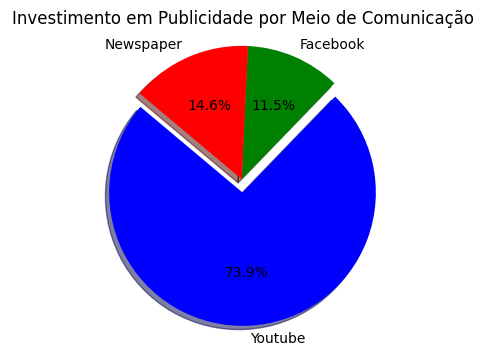

In [ ]:
# Calculating the sum of each media
youtube_sum = df['youtube'].sum()
facebook_sum = df['facebook'].sum()
newspaper_sum = df['newspaper'].sum()

# Values ​​and labels for the pie chart
sizes = [youtube_sum, facebook_sum, newspaper_sum]
labels = ['Youtube', 'Facebook', 'Newspaper']
colors = ['blue', 'green', 'red']
explode = (0.1, 0, 0)  # explode 1st slice (i.e., 'Youtube') for emphasis

# Creating the pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Investimento em Publicidade por Meio de Comunicação')
plt.show()

**Entendendo meu ROI**

Através do realizado descobri que o meu ROI está muito baixo,
por volta de 7% do valor investido

In [ ]:
ROI_GERAL = df['sales'].sum() /(df['youtube'].sum() + df['facebook'].sum() + df['newspaper'].sum())
print(ROI_GERAL)

0.07023875058617242


Descobrindo a correlação em cada investimento
</p>Usando o método de Pearson</p>

Descobrimos a ordem de modelos com melhor sinergia para venda no modelo atual.

Youtube com 78% de correlação
Facebook com 60% de correlação
Newspaper com 25% de correlação


In [ ]:
youtube_corr = df['youtube'].corr(df['sales'])
facebook_corr = df['facebook'].corr(df['sales'])
newspaper_corr = df['newspaper'].corr(df['sales'])

print(f"Correlação entre YouTube e Vendas: {youtube_corr}")
print(f"Correlação entre Facebook e Vendas: {facebook_corr}")
print(f"Correlação entre Jornal e Vendas: {newspaper_corr}")

Correlação entre YouTube e Vendas: 0.7820300203008935
Correlação entre Facebook e Vendas: 0.6029180163242249
Correlação entre Jornal e Vendas: 0.254986978034823


Criando gráficos de dispersão e de calor para visualizar essas correlaçoes

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales', 'total_investment'], dtype='object')

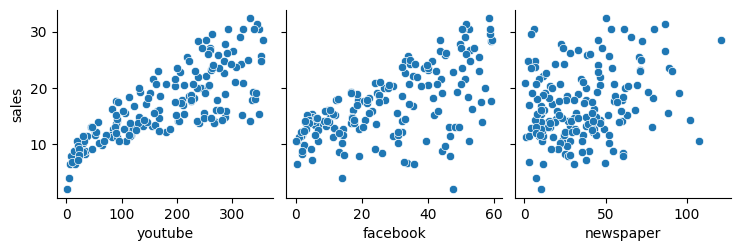

In [ ]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper'], y_vars=["sales"])


<Axes: >

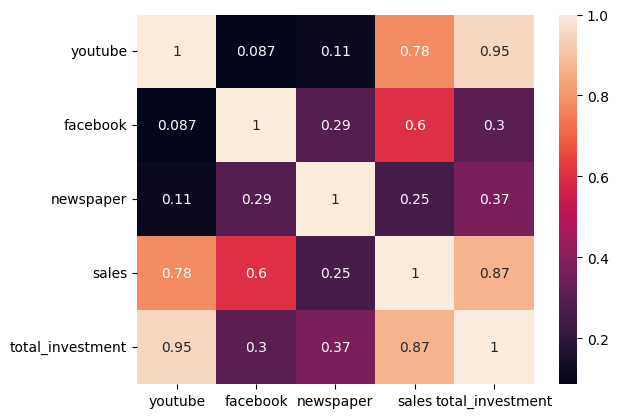

In [ ]:
sns.heatmap(df.corr(), annot=True)

Criando um histograma pra entender o comportamento das vendas:
</p>identificamos que a maioria das vendas são superiores a 10 e inferiores à 20

<Axes: xlabel='sales', ylabel='Count'>

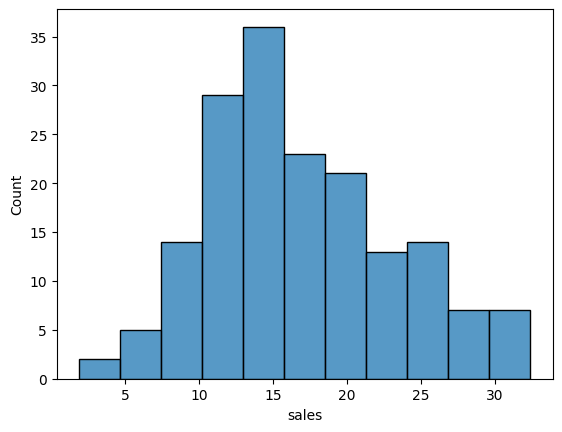

In [ ]:
sns.histplot(df['sales'])

Criando o modelo de Regressão Linear pedido pelo Cliente

In [ ]:
#defining the variables of the linear regression model
X = df[['youtube', 'facebook', 'newspaper']]
y = df[['sales']]

In [ ]:
#train the model
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size = 0.3, random_state = 45)

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#importing metrics: r2score
y_pred = model_lr.predict(X_test)
r = r2_score(y_test, y_pred)
print("r_quadrado", r)

r_quadrado 0.8796706231704091


Plotanto um Gráfico de linhas para comparar o desenvolvimento do modelo de ML(regressão linear) x Os dados reais

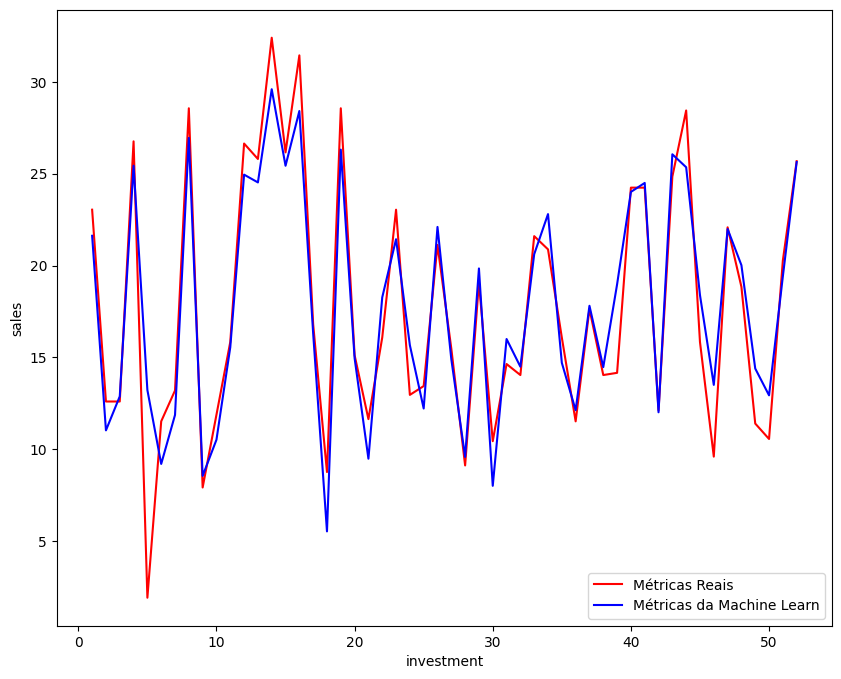

In [ ]:
c = c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize = (10, 8))
plt.plot(c, y_test, color = 'red', label='Métricas Reais')
plt.plot(c, y_pred, color = 'blue', label='Métricas da Machine Learn')
plt.xlabel("investment")
plt.ylabel('sales')
plt.legend(loc='lower right')

Experimentos utilizandos o modelo para definir as melhores métricas de investimento

In [ ]:
#Estimando o valor dentro do modelo de acordo com um parâmretro determinado
youtube_test_01 = 100
facebook_test_01   = 00
newspaper_test_01  = 00
test_01 = [[youtube_test_01 , facebook_test_01, newspaper_test_01]]

model_lr.predict(test_01)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8.49802981]])

Analisando se o comportamento isoladamente respeita a mesma regra do comportamento simutâneo. </p>
Concluímos que não segue a mesma variação

Acompanhando os dataframes na plotagem do gráfico identificamos um padrão de comportamento quando acompanhadas isoladamente.</p>

Para cada variância do valor de x o valor da coluna sales
varia em: </p>
Youtube: 0.044136687008096 </p>
Facebook: 0.1938453356041035 </p>
Newspaper: −0.010553704155324

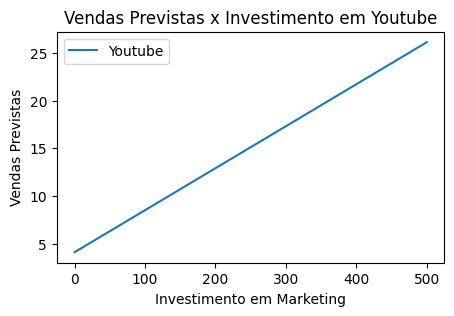

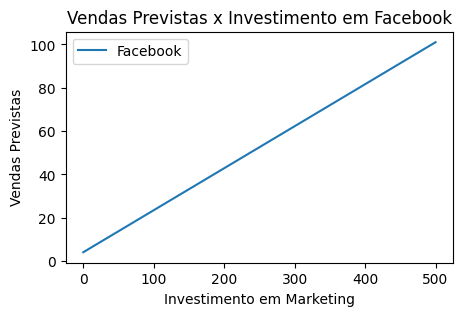

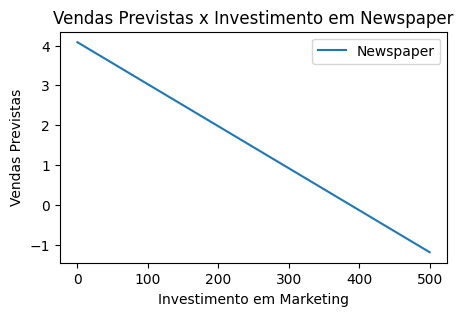

In [ ]:
# Intervalo de valores para variação (0-500)
x = np.arange(0, 501, 1)

# Primeiro gráfico: variando Youtube
data_youtube = {'Investimento': [], 'Vendas_Previstas': []}
for value in x:
    test_df = pd.DataFrame({'youtube': [value], 'facebook': [0], 'newspaper': [0]})
    prediction = model_lr.predict(test_df)[0]
    data_youtube['Investimento'].append(value)
    data_youtube['Vendas_Previstas'].append(prediction)

    df_youtube = pd.DataFrame(data_youtube)



plt.figure(figsize=(5, 3))
plt.plot(df_youtube['Investimento'], df_youtube['Vendas_Previstas'], label='Youtube')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Vendas Previstas')
plt.title('Vendas Previstas x Investimento em Youtube')
plt.legend()
plt.show()

# Segundo gráfico: variando Facebook

data_facebook = {'Investimento': [], 'Vendas_Previstas': []}
for value in x:
    test_df = pd.DataFrame({'youtube': [0], 'facebook': [value], 'newspaper': [0]})
    prediction = model_lr.predict(test_df)[0]
    data_facebook['Investimento'].append(value)
    data_facebook['Vendas_Previstas'].append(prediction)

df_facebook = pd.DataFrame(data_facebook)


plt.figure(figsize=(5, 3))
plt.plot(df_facebook['Investimento'], df_facebook['Vendas_Previstas'], label='Facebook')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Vendas Previstas')
plt.title('Vendas Previstas x Investimento em Facebook')
plt.legend()
plt.show()


# Terceiro gráfico: variando Newspaper
data_newspaper = {'Investimento': [], 'Vendas_Previstas': []}
for value in x:
    test_df = pd.DataFrame({'youtube': [0], 'facebook': [0], 'newspaper': [value]})
    prediction = model_lr.predict(test_df)[0]
    data_newspaper['Investimento'].append(value)
    data_newspaper['Vendas_Previstas'].append(prediction)

df_newspaper = pd.DataFrame(data_newspaper)

plt.figure(figsize=(5, 3))
plt.plot(df_newspaper['Investimento'], df_newspaper['Vendas_Previstas'], label='Newspaper')
plt.xlabel('Investimento em Marketing')
plt.ylabel('Vendas Previstas')
plt.title('Vendas Previstas x Investimento em Newspaper')
plt.legend()
plt.show()